#  One-liners in Pandas Every Data Scientist Should Know   
https://towardsdatascience.com/powerful-one-liners-in-pandas-every-data-scientist-should-know-737e721b81b6


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import random

city_list = ["New York", "Manchester", "California", "Munich", "Bombay", 
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer", "Test Engineer", 
            "Software Development Engineer-II", "Python Developer", "Back End Developer",
            "Front End Developer", "Data Scientist", "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft", 
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]

data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])
    
data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary", 
                                   "Employment Status", "Employee Rating"])                                 

## #1 n-largest values in a series
Say we want to start off by finding the top-n paid roles in this dataset. You can do this using the nlargest() method in Pandas. This method returns the first n rows with the largest values in column(s), ordered in descending order.

Note that nlargest() returns the entire DataFrame, i.e., the function also returns the columns not specified for ordering. However, they are not used to order the DataFrame. The code snippet below depicts the use of nlargest() method on our DataFrame.

In [10]:
n = 6
data.nlargest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
431,Google,Python Developer,London,1000000,Full Time,0.2
155,Microsoft,Python Developer,Bombay,999000,Intern,0.8
746,Wipro,IOS Developer,Moscow,999000,Intern,3.9
697,Infosys,IOS Developer,Moscow,998000,Full Time,1.4
119,Mastercard,Back End Developer,Bombay,995000,Intern,2.6
728,Amazon,Front End Developer,Munich,994000,Full Time,2.3
941,Google,Python Developer,Tokyo,994000,Full Time,1.9


When duplicate values exist, we need to specify which particular row(s) we want in the final output.  
This is done using the keep argument that can take the following values:  
keep = "first": prioritizes the first occurrence.  
keep = "last": prioritizes the last occurrence.  
keep = "all": Does not drop any duplicates, even if it means selecting more than n items (like in the image above).  

It is often mistaken that the nlargest()is precisely equivalent to using the sort_values()method as follows:  

In [11]:
n=6
data.sort_values("Employee Salary", ascending=False).head(n)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
431,Google,Python Developer,London,1000000,Full Time,0.2
746,Wipro,IOS Developer,Moscow,999000,Intern,3.9
155,Microsoft,Python Developer,Bombay,999000,Intern,0.8
697,Infosys,IOS Developer,Moscow,998000,Full Time,1.4
119,Mastercard,Back End Developer,Bombay,995000,Intern,2.6
728,Amazon,Front End Developer,Munich,994000,Full Time,2.3


However, the keep argument used in nlargest() makes all the difference.  
Considering the example above, nlargest() with keep=”all"returns potential duplicates as well.  

This, on the other hand, can not be done in the case of sort_values() method.

In [12]:
n = 7
data.nsmallest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
287,Uber,Software Development Engineer,London,0,Full Time,1.7
855,Infosys,Python Developer,Munich,3000,Full Time,2.3
970,Cognizant,Back End Developer,New York,4000,Full Time,2.6
326,Amazon,Test Engineer,Sydeny,7000,Full Time,1.8
116,Infosys,Android Developer,Moscow,8000,Full Time,0.1
385,Microsoft,Software Development Engineer,Moscow,8000,Full Time,4.2
210,Google,Research Engineer,Bombay,9000,Full Time,3.9


## 3. CrossTabs
Crosstab allows you to compute a cross-tabulation of two (or more) columns/series and returns a frequency of each combination by default.  In other words, crosstab() takes one column/list, displays its unique values as indexes, and then takes another column/list and displays its unique values as the column headers. The values in the individual cells are computed using an aggregation function. By default, they indicate the co-occurrence frequency.  

Say, for instance, we wish to compute the number of employees working from each location within every company. This can be done as follows: 



In [13]:
pd.crosstab(data["Company Name"], data["Employee Work Location"])

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,7,13,9,9,6,12,14,9,9,13
Apple,5,4,15,6,11,9,10,10,9,11
Cognizant,7,9,11,9,6,7,14,11,13,11
Google,17,7,8,9,10,5,9,10,11,12
IBM,10,11,10,12,12,12,10,6,14,13
Infosys,9,9,10,13,11,9,12,10,14,11
Mastercard,11,11,11,7,5,13,12,12,9,6
Microsoft,11,11,11,15,9,5,5,15,8,7
Uber,10,10,4,14,10,9,8,12,6,8


As it can be hard to interpret numerical values in a crosstab (and to make it more visually appealing), we can generate a heatmap from a crosstab shown below as follows:

<AxesSubplot:xlabel='Employee Work Location', ylabel='Company Name'>

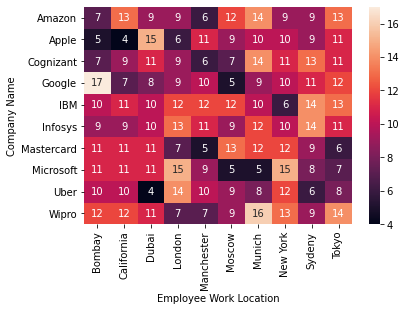

In [15]:
import seaborn as sns
result_crosstab = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result_crosstab, annot=True)

If you wish to compute aggregation on some column other than the ones that make up the indexes and the column headers, you can do so by passing the aggregation column to values argument of crosstab()as shown below:

<AxesSubplot:xlabel='Employment Status', ylabel='Company Name'>

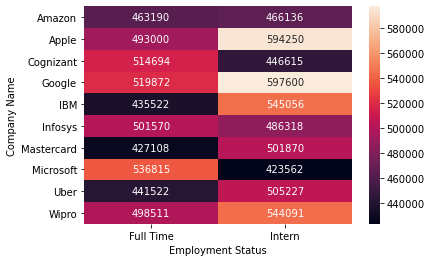

In [16]:
result_crosstab = pd.crosstab(index = data["Company Name"], 
                              columns=data["Employment Status"], 
                              values = data["Employee Salary"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')

## 4.Pivot Table
Pivot tables are a commonly used data analysis tool in Excel. Similar to crosstabs discussed above, pivot tables in Pandas provide a way to cross-tabulate your data.

Although they both share numerous similarities and are conceptually the same in the context of Pandas, there are a few implementational differences that make them different (further reading [here](https://towardsdatascience.com/powerful-one-liners-in-pandas-every-data-scientist-should-know-737e721b81b6#:~:text=%234%20Pivot%20Table,Name%E2%80%9D%20and%20%E2%80%9CLocation%E2%80%9D%3A)). The code snippet below demonstrates the use of the pivot_table() method to find the frequency of co-occurrence between the “Company Name” and “Location”:

In [17]:
pd.pivot_table(data, 
               index=["Company Name"], 
               columns=["Employee Work Location"], 
               aggfunc='size', 
               fill_value=0)

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,7,13,9,9,6,12,14,9,9,13
Apple,5,4,15,6,11,9,10,10,9,11
Cognizant,7,9,11,9,6,7,14,11,13,11
Google,17,7,8,9,10,5,9,10,11,12
IBM,10,11,10,12,12,12,10,6,14,13
Infosys,9,9,10,13,11,9,12,10,14,11
Mastercard,11,11,11,7,5,13,12,12,9,6
Microsoft,11,11,11,15,9,5,5,15,8,7
Uber,10,10,4,14,10,9,8,12,6,8


Similar to what we did in Crosstab, we can create a heatmap to make it visually appealing as well as more interpretable. This can be done as shown in the code snippet to generate the following hea

<AxesSubplot:xlabel='Employee Work Location', ylabel='Company Name'>

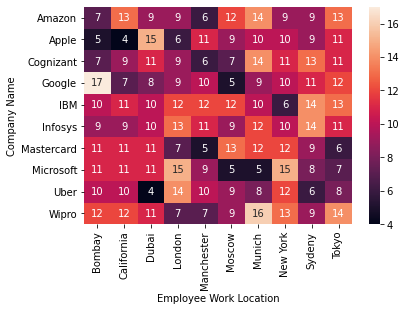

In [18]:
result_pivot = pd.pivot_table(data, 
                              index=["Company Name"], 
                              columns=["Employee Work Location"], 
                              aggfunc='size', 
                              fill_value=0)
               
sns.heatmap(result_pivot, annot = True, fmt = 'g')

## 5. Handling Duplicated Data
In addition to the regular data analysis, appropriately handling duplicate values in your data also plays a vital role in building your data pipeline. One major caveat of having duplicates in your data is that they take up unnecessary storage space and slow down the computation by acquiring resources. Furthermore, duplicate data can skew analysis results, leading us to draw wrong insights. Therefore, removing or handling duplicates in your data is extremely important.

First, let’s look at how you can mark duplicate values in your DataFrame. For this, we’ll use the duplicated()method in Pandas. This returns a boolean Series that indicates duplicate rows. For demonstration purposes, I’ll only use a random sample of 10 rows of the original salary dataset, of which the last two rows have been intentionally duplicated. The sampled rows are shown in the image below.

In [21]:
data

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Amazon,Software Development Engineer,London,52000,Intern,0.5
1,Apple,Research Engineer,Dubai,881000,Full Time,0.0
2,IBM,Back End Developer,Manchester,67000,Full Time,4.9
3,Apple,Test Engineer,New York,64000,Full Time,1.5
4,Apple,Software Development Engineer-II,Tokyo,247000,Intern,0.3
...,...,...,...,...,...,...
995,Google,Software Development Engineer-II,California,284000,Full Time,4.1
996,Apple,Research Engineer,Munich,69000,Full Time,0.1
997,Mastercard,IOS Developer,Sydeny,72000,Full Time,2.1
998,IBM,Research Engineer,Dubai,457000,Intern,4.1


### Mark duplicated rows
Pandas allows you to assign boolean labels to rows based on all columns (or a subset of columns) which are duplicates. This can be done using the duplicated() method of Pandas as shown below:

In [28]:
data.sort_values(by=['Employee Work Location']).duplicated(subset=['Employee Work Location'], keep = "first")

622    False
523     True
185     True
520     True
91      True
       ...  
159     True
817     True
256     True
934     True
607     True
Length: 1000, dtype: bool